Iteration 1, volume diff: 425729.70
Iteration 2, volume diff: 94538.35
Iteration 3, volume diff: 11156.71


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Iteration 4, volume diff: 224.00
Convergence reached.


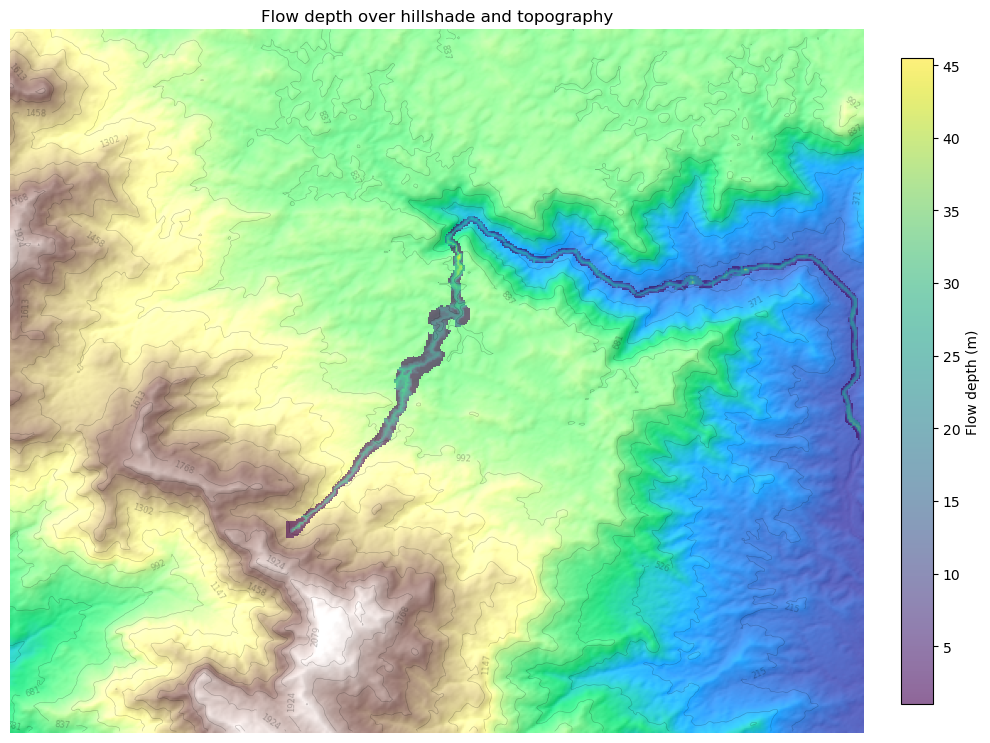

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


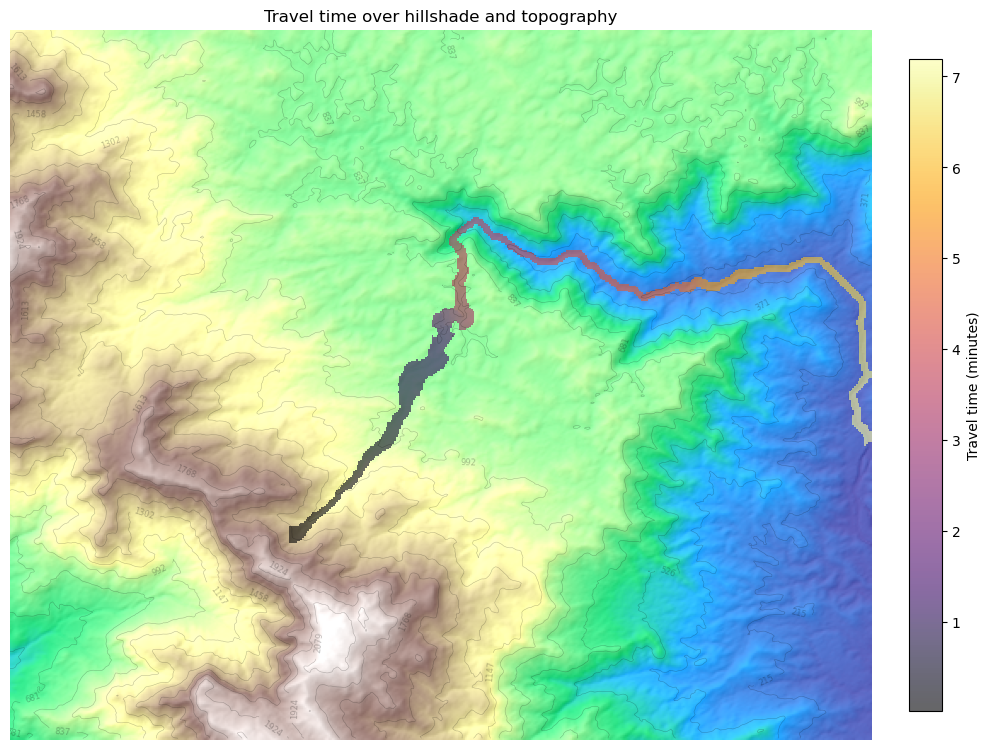

In [4]:
from debrisfast import debrisfast_main

dem_path = 'waydem.tif'
start_volume = 1e6  # initial flow volume in m³
start_point = (296, 163)  #Starting point (row, col)
# start_point = (100, 20)  #Starting point (row, col)

# debrisfast_main(dem_path,start_volume,start_point) #This can run all in one function.


from debrisfast import debrisfast_dem_preprocess, debrisfast_xsections, debrisfast_mainflow, debrisfast_figures, debrisfast_save
dem,hand,slope_deg,flow_path = debrisfast_dem_preprocess(dem_path, start_point)
    
cross_section_values, distances, angles = debrisfast_xsections(dem, flow_path)

flow_mask, flow_depth_raster, velocity_raster, travel_time_raster, erosion_total=debrisfast_mainflow(
    dem,hand,slope_deg,flow_path, dem_path,start_volume,start_point, cross_section_values, distances, angles)

debrisfast_figures(dem, flow_depth_raster, travel_time_raster)

debrisfast_save(
    output_dir='outputs/',
    dem_path='waydem.tif',
    flow_mask=flow_mask,
    flow_depth_raster=flow_depth_raster,
    velocity_raster=velocity_raster,
    travel_time_raster=travel_time_raster,
    erosion_total=erosion_total
)
